In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
%matplotlib inline

df = pd.read_csv('./febrile_seizures.csv')
df.head()

,Gender,Social Status,Age,Education level,Working in health,Where are you living,child had convulsions,Temperature cause convulsions,Spasm is a type of epilepsy,Is it dangerous up to 5 years,...,Child with cramps should be placed on his left or right side,necessary to observe the apparent child characteristics,Child should be taken to the doctor immediately,Put anything inside child mouth prevent child from biting his teeth with force,Child must be resuscitated by introducing air through mouth,Secretions should be withdrawn,Heart must be refreshed,Dealing with a child when has a cramp,having thermometer at home,Know how to use thermometer
0,male,Single,20 - 25,college,Health,Eastern,No,Yes,No,Yes,...,Dont Know,Yes,No,No,No,Yes,No,Yes,Yes,Yes
1,Female,Single,20 - 25,college,nonH,Eastern,No,Yes,Dont Know,Yes,...,Dont Know,Yes,Dont Know,Dont Know,Dont Know,Dont Know,Dont Know,Dont Know,No,Yes
2,male,Married,26 - 40,college,nonH,Eastern,No,Yes,No,Yes,...,Dont Know,Yes,No,Dont Know,No,No,No,Dont Know,Yes,Yes
3,Female,Married,40 - 60,college,nonH,Eastern,No,Yes,No,Yes,...,Dont Know,Yes,No,Yes,Yes,Yes,Dont Know,No,Yes,Yes
4,Female,Married,40 - 60,college,Health,Eastern,No,Yes,Yes,Yes,...,Dont Know,Yes,No,Yes,Dont Know,Dont Know,Dont Know,Dont Know,Yes,Yes


In [9]:
married_df = df[df['Social Status'] == 'Married']
single_df = df[df['Social Status'] == 'Single']
married_df.shape

(703, 37)

In [8]:
df['Social Status'].value_counts()

Married    703
Single     124
Name: Social Status, dtype: int64

In [36]:
male_df = df[df['Gender'] == 'male']
female_df = df[df['Gender'] == 'Female']
female_df.shape

(662, 37)

In [40]:
df['Gender'].value_counts()

Female    662
male      165
Name: Gender, dtype: int64

In [42]:
df['Gender'].value_counts()/df['Gender'].shape

Female    0.800484
male      0.199516
Name: Gender, dtype: float64

In [37]:
male_df['Education level'].value_counts()

college    102
phd         40
high        23
Name: Education level, dtype: int64

In [38]:
male_df['Education level'].value_counts()/(male_df.shape[0] - sum(male_df['Education level'].isnull()))

college    0.618182
phd        0.242424
high       0.139394
Name: Education level, dtype: float64

In [25]:
female_df['Education level'].value_counts()

college    450
high       129
phd         64
Less        19
Name: Education lelvel, dtype: int64

In [39]:
female_df['Education level'].value_counts()/(female_df.shape[0] - sum(female_df['Education level'].isnull()))

college    0.679758
high       0.194864
phd        0.096677
Less       0.028701
Name: Education level, dtype: float64

In [10]:
college_df = df[df['Education level'] == 'college']
high_df = df[df['Education level'] == 'high']
phd_df = df[df['Education level'] == 'phd']
less_df = df[df['Education level'] == 'Less']
high_df.shape

(152, 37)

In [19]:
df['Education level'].value_counts()/df['Education level'].shape

college    0.667473
high       0.183797
phd        0.125756
Less       0.022975
Name: Education level, dtype: float64

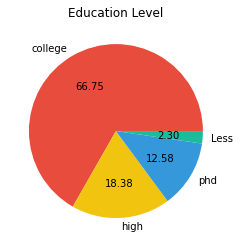

In [13]:
college = df.loc[df['Education level'] == 'college'].count()[0]
high = df.loc[df['Education level'] == 'high'].count()[0]
phd = df.loc[df['Education level'] == 'phd'].count()[0]
less = df.loc[df['Education level'] == 'Less'].count()[0]
labels = ['college', 'high', 'phd' , 'Less']
colors = ['#E74C3C','#F1C40F','#3498DB', '#1ABC9C']

plt.pie([college , high , phd , less] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Education Level")
plt.show()

In [45]:
college_df['Gender'].value_counts()

Female    450
male      102
Name: Gender, dtype: int64

In [47]:
high_df['Gender'].value_counts()

Female    129
male       23
Name: Gender, dtype: int64

In [11]:
phd_df['Gender'].value_counts()

Female    64
male      40
Name: Gender, dtype: int64

In [12]:
less_df['Gender'].value_counts()

Female    19
Name: Gender, dtype: int64

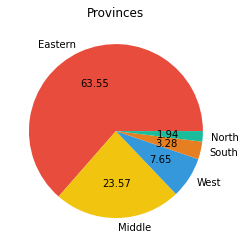

In [22]:
e = df.loc[df['Where are you living'] == 'Eastern'].count()[0]
m = df.loc[df['Where are you living'] == 'middle'].count()[0]
w = df.loc[df['Where are you living'] == 'West'].count()[0]
s = df.loc[df['Where are you living'] == 'south'].count()[0]
n = df.loc[df['Where are you living'] == 'north'].count()[0]
labels = ['Eastern', 'Middle', 'West' , 'South', 'North']
colors = ['#E74C3C','#F1C40F','#3498DB','#E67E22','#1ABC9C']

plt.pie([e , m , w , s , n] , labels=labels , colors=colors , autopct = '%.2f')

plt.title("Provinces")
plt.show()